In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = os.listdir('./dataset')
print(files)

['SampleSubmissionWiDS2021.csv', 'DataDictionaryWiDS2021.csv', 'UnlabeledWiDS2021.csv', 'SolutionTemplateWiDS2021.csv', 'TrainingWiDS2021.csv']


In [3]:
train_data = pd.read_csv('./dataset/'+files[4])
test_data = pd.read_csv('./dataset/'+files[2])

In [4]:
train_data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Class distribution

In [6]:
train_data.groupby(by='diabetes_mellitus').count()['encounter_id']

diabetes_mellitus
0    102006
1     28151
Name: encounter_id, dtype: int64

In [7]:
class_dist_count = dict(train_data.groupby(by='diabetes_mellitus').count()['encounter_id'])
class_dist_perc = dict()
class_dist_perc[0] = float(class_dist_count[0])/(class_dist_count[0] + class_dist_count[1])
class_dist_perc[1] = 1-class_dist_perc[0]
print(class_dist_count)
print(class_dist_perc)


{0: 102006, 1: 28151}
{0: 0.7837150518220303, 1: 0.21628494817796973}


In [8]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

/home/arun/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


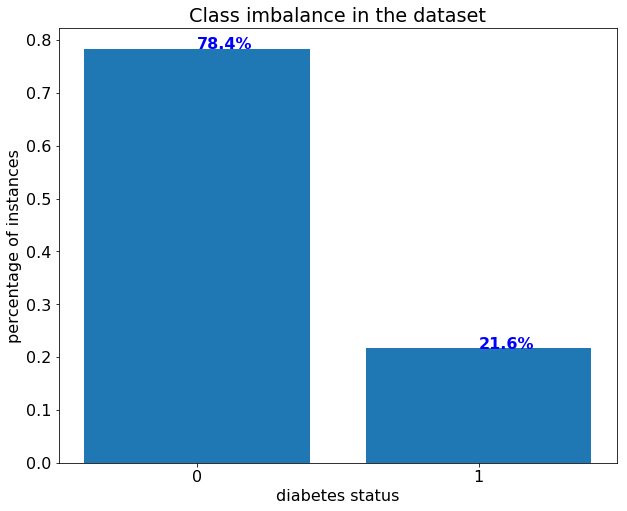

In [9]:
plt.figure(figsize=(10,8))
plt.title("Class imbalance in the dataset")
plt.bar(class_dist_perc.keys(),class_dist_perc.values())
plt.xlabel("diabetes status")
plt.ylabel("percentage of instances")
plt.xticks([0,1])
for i, v in enumerate(class_dist_perc.values()):
    plt.text(i,v,  str(100*round(v,3))+'%', color='blue', fontweight='bold')

## Missing values

In [10]:
def dropMissingValues(dataset,threshold):
    na_count = []
    for col in dataset.columns:
        na_count.append(dataset[col].isna().sum())
    missing_values = pd.DataFrame()
    missing_values['feature'] = pd.Series(dataset.columns)
    missing_values['nans'] = pd.Series(na_count)
    missing_values['perc_missing'] = pd.Series([n/float(len(dataset)) for n in na_count])
    
    dropped_features = missing_values[missing_values['perc_missing']>=threshold]
    
    return dict(zip(dropped_features.feature, dropped_features.perc_missing))

In [11]:
X = train_data.drop(columns='diabetes_mellitus')
X = X.drop(columns='Unnamed: 0')
y = pd.DataFrame(train_data['diabetes_mellitus'])

In [12]:
perc_list = list(np.linspace(0,1,11))
n_dropped = []
for perc in perc_list:
    drop_list = dropMissingValues(X,perc)
    n_dropped.append(len(drop_list.keys()))

<BarContainer object of 11 artists>

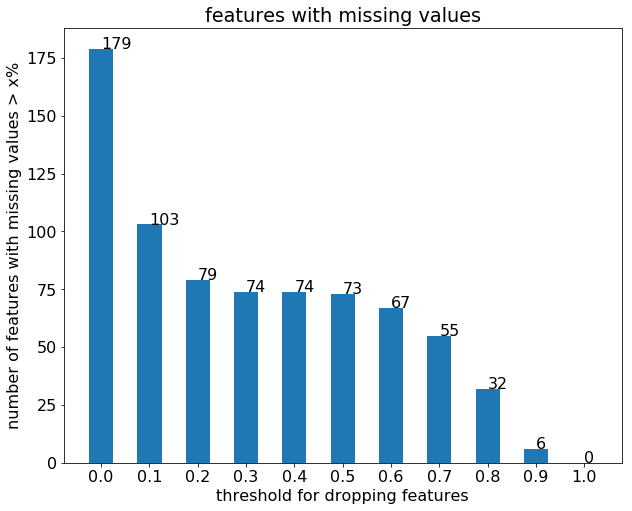

In [13]:
plt.figure(figsize=(10,8))
plt.title("features with missing values")
plt.xlabel('threshold for dropping features')
plt.ylabel('number of features with missing values > x%')
plt.xticks(perc_list)
for i,v in enumerate(n_dropped):
    plt.text(i/10.0,v,str(v))
plt.bar(perc_list,n_dropped,width = 0.05)

## Drop columns with missing values % > threshold

In [14]:
drop_list = dropMissingValues(X,0.5)
X_dropped_cols = X.drop(columns=drop_list.keys())

## Finding categotical variables

In [15]:
categoricals = list(X_dropped_cols.select_dtypes(include=['category','object']))
numericals = list(X_dropped_cols.select_dtypes(exclude=['category','object']))
print("categorical features : \t{}\n{}\n\nnumerical features : \t{}\n{}".format(len(categoricals),categoricals,len(numericals),numericals))
# print(numericals)

categorical features : 	6
['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type']

numerical features : 	100
['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min

## Imputing missing values

In [16]:
for col in X_dropped_cols.columns:
    if col in categoricals:
        X_dropped_cols[col] = X_dropped_cols[col].fillna(X_dropped_cols[col].mode()[0])
    elif col in numericals:
        X_dropped_cols[col] = X_dropped_cols[col].fillna(X_dropped_cols[col].median())

## One-hot encoding

In [17]:
for col in categoricals:
    X_dropped_cols = pd.get_dummies(X_dropped_cols,prefix=[col], columns = [col], drop_first=True)

## running a model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_dropped_cols,y,test_size = 0.25,random_state = 42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,bootstrap=True,random_state = 42)
rf.fit(X_train,np.array(y_train).ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
y_pred = rf.predict(X_test)

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(np.array(y_test).ravel(),y_pred)

0.6478979122140859

In [22]:
feat_imp = pd.DataFrame()
feat_imp['feature'] = pd.Series(X_dropped_cols.columns)
feat_imp['importance'] = pd.Series(rf.feature_importances_)
feat_imp.sort_values(by='importance',ascending=False)

,feature,importance
77,d1_glucose_max,0.097927
20,glucose_apache,0.072320
78,d1_glucose_min,0.023281
3,bmi,0.021888
9,weight,0.019661
75,d1_creatinine_max,0.014060
76,d1_creatinine_min,0.013621
2,age,0.013094
6,icu_id,0.012656
15,creatinine_apache,0.012412


<BarContainer object of 10 artists>

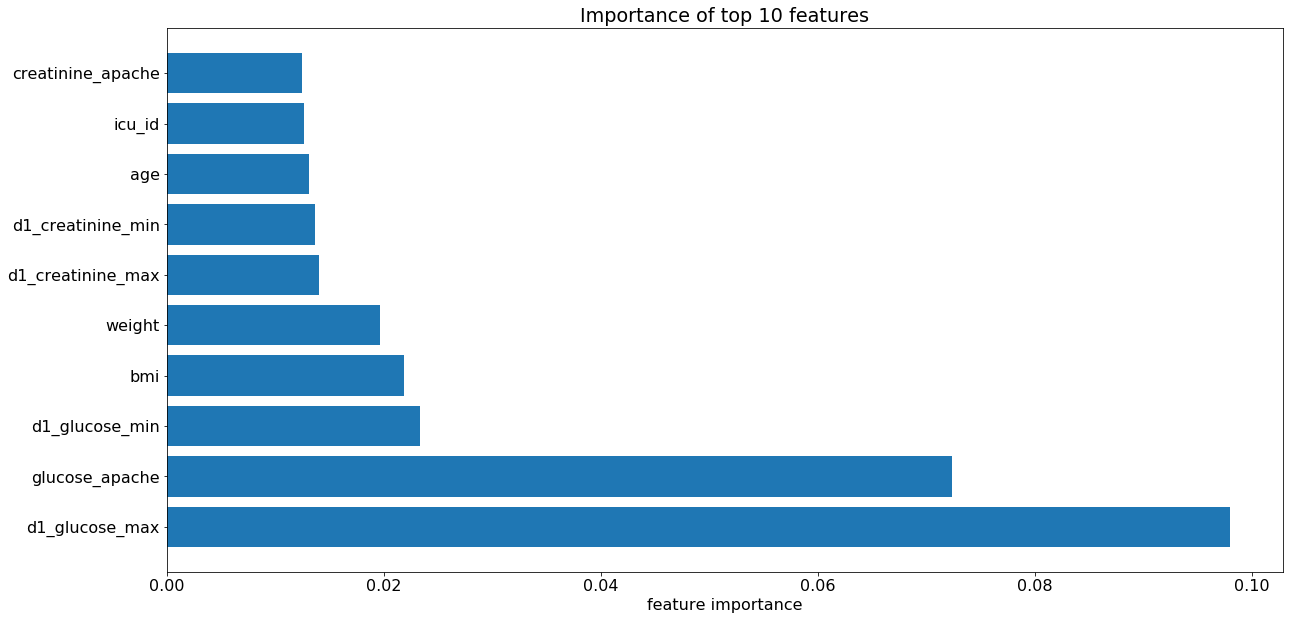

In [23]:
feat_imp = feat_imp.sort_values(by='importance',ascending=False)
plt.figure(figsize=(20,10))
plt.xlabel("feature importance")
plt.title("Importance of top 10 features")
plt.barh(feat_imp.feature[:10],feat_imp.importance[:10])

## running a barebones model

In [24]:
feature_selected = ['d1_glucose_max',
                    'glucose_apache',
                    'd1_glucose_min',
                    'weight','bmi',
                    'd1_creatinine_max',
                    'creatinine_apache',
                    'age']
X_b = X_dropped_cols[feature_selected]

In [25]:
X_train, X_test,y_train, y_test = train_test_split(X_b,y,test_size = 0.25,random_state = 42)

In [26]:
rf = RandomForestClassifier(n_estimators=100,bootstrap=True,random_state=42)
rf.fit(X_train,np.array(y_train).ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
y_pred = rf.predict(X_test)

In [28]:
roc_auc_score(np.array(y_test).ravel(),y_pred)

0.6428797485026977

In [29]:
rf_500 = RandomForestClassifier(n_estimators=500, bootstrap=True,random_state=42)
rf_500.fit(X_train,np.array(y_train).ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
y_pred = rf_500.predict(X_test)

In [31]:
roc_auc_score(np.array(y_test).ravel(),y_pred)

0.6488216583091682

In [33]:
summary = pd.DataFrame()
summary['n_trees'] = pd.Series([100,100,500])
summary['n_features'] = pd.Series([106,7,7])
summary['auc'] = pd.Series([0.6478979122140859,0.6428797485026977,0.6488216583091682])
summary.reset_index(drop=True, inplace=True)
summary

,n_trees,n_features,auc
0,100,106,0.647898
1,100,7,0.642880
2,500,7,0.648822
